# Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline


# Data Collection

In [7]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Data Visualization

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


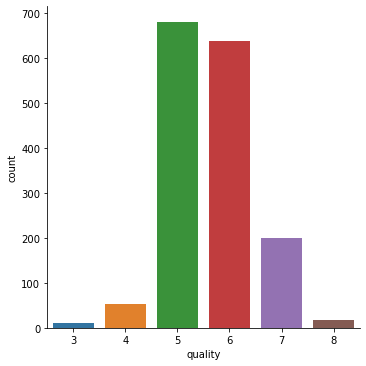

In [11]:
sns.catplot(x=df.quality,data=df,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

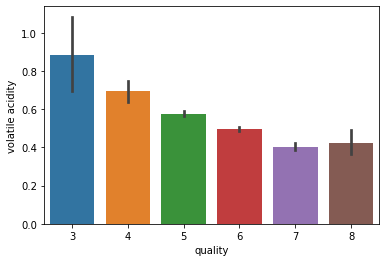

In [15]:
sns.barplot(x='quality',y='volatile acidity',data=df)
#Volatile acidity is inversely proportional to quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

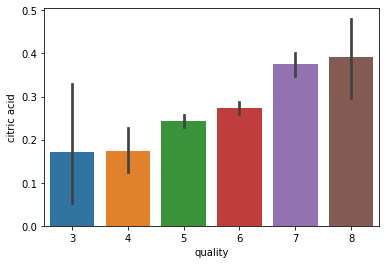

In [17]:
sns.barplot(x='quality',y='citric acid',data=df)
#citric acid is directly proportional to quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

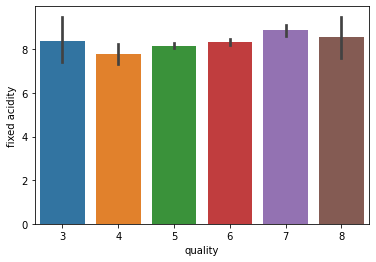

In [18]:
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

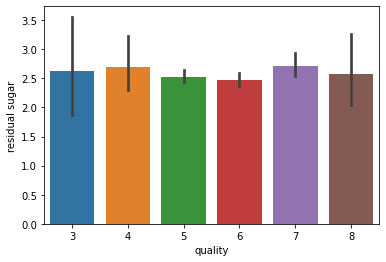

In [19]:
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

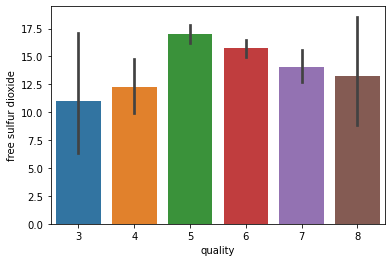

In [20]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

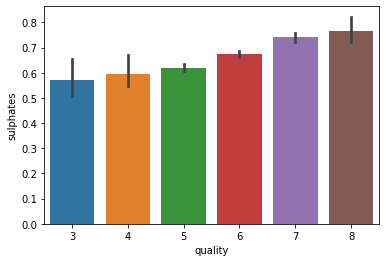

In [23]:

sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

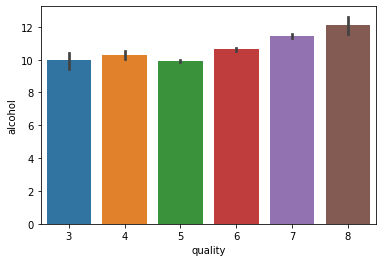

In [24]:

sns.barplot(x='quality',y='alcohol',data=df)

<AxesSubplot:>

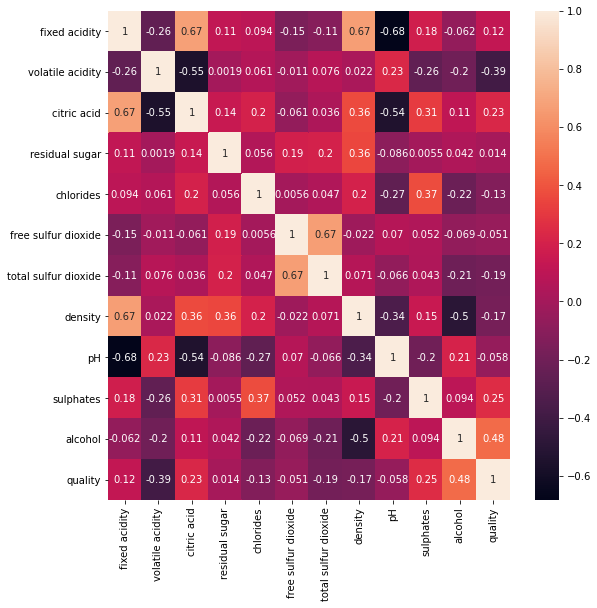

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,)

# Data Preprocessing

In [36]:
X=df.drop('quality',axis=1)


In [37]:
# Label Binarization
y=df.quality.apply(lambda yval:1 if yval>=7 else 0)

In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# Train Test Split

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Model Training

In [40]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
pred=rf.predict(X_test)

# Model Evaluation

In [45]:
acc=accuracy_score(pred,y_test)

In [46]:
acc

0.9

# Building Predictive System

In [52]:
ip_data=(7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)
ip_data=np.asarray(ip_data)

data_reshaped=ip_data.reshape(1,-1)
prediction=rf.predict(data_reshaped)
if prediction[0]==1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine
